In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

%matplotlib inline

In [128]:
weather = pd.read_csv('weather.csv') 
train = pd.read_csv('train.csv')

In [129]:
weather.shape

(2944, 22)

In [130]:
train

Date                                            Address  \
0      2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1      2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2      2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3      2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4      2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
5      2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6      2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
7      2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
8      2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
9      2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   
10     2007-05-29    2100 North Stave Street, Chicago, IL 60647, USA   
11     2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA   
12     2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA   
13     2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA   
14     2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA   
15     2007-05-29   1100 South Peoria Street, Chicago, IL 60608, USA   
16     2007-05-29      1700 West 95th Street, Chicago, IL 60643, USA   
17     2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA   
18     2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA   
19     2007-05-29       North Streeter Drive, Chicago, IL 60611, USA   
20     2007-05-29       North Streeter Drive, Chicago, IL 60611, USA   
21     2007-05-29  6500 North Oak Park Avenue, Chicago, IL 60631,...   
22     2007-05-29   7500 North Oakley Avenue, Chicago, IL 60645, USA   
23     2007-05-29     1500 North Long Avenue, Chicago, IL 60651, USA   
24     2007-05-29  8900 South Carpenter Street, Chicago, IL 60620...   
25     2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
26     2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
27     2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
28     2007-06-05    7900 West Foster Avenue, Chicago, IL 60656, USA   
29     2007-06-05    7900 West Foster Avenue, Chicago, IL 60656, USA   
30     2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
31     2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
32     2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
33     2007-06-05     2500 West Grand Avenue, Chicago, IL 60654, USA   
34     2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
35     2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
36     2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
37     2007-06-05   1100 West Chicago Avenue, Chicago, IL 60642, USA   
38     2007-06-05    2100 North Stave Street, Chicago, IL 60647, USA   
39     2007-06-05    2100 North Stave Street, Chicago, IL 60647, USA   
40     2007-06-05    2200 North Cannon Drive, Chicago, IL 60614, USA   
41     2007-06-05     2200 West 113th Street, Chicago, IL 60643, USA   
42     2007-06-05      1700 West 95th Street, Chicago, IL 60643, USA   
43     2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
44     2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
45     2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
46     2007-06-05  6500 North Oak Park Avenue, Chicago, IL 60631,...   
47     2007-06-05  6500 North Oak Park Avenue, Chicago, IL 60631,...   
48     2007-06-05     1500 North Long Avenue, Chicago, IL 60651, USA   
49     2007-06-05  8900 South Carpenter Street, Chicago, IL 60620...   
50     2007-06-05   9100 West Higgins Avenue, Chicago, IL 60656, USA   
51     2007-06-05  3600 North Pittsburgh Avenue, Chicago, IL 6063...   
52     2007-06-05    7200 North Oketo Avenue, Chicago, IL 60631, USA   
53     2007-06-05  3800 North California Avenue, Chicago, IL 6061...   
54     2007-06-05  4900 West Balmoral Avenue, Chicago

In [131]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [132]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [133]:
weather['Date']= weather['Date'].astype('datetime64[ns]')

In [134]:
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                object
Heat                   object
Cool                   object
Sunrise                object
Sunset                 object
CodeSum                object
Depth                  object
Water1                 object
SnowFall               object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object

In [135]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [136]:
weather.head()

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50   67     14        51      56    0    2   
1        2 2007-05-01    84    52   68      M        51      57    0    3   
2        1 2007-05-02    59    42   51     -3        42      47   14    0   
3        2 2007-05-02    60    43   52      M        42      47   13    0   
4        1 2007-05-03    66    46   56      2        40      48    9    0   

  Sunrise Sunset CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
0    0448   1849             0      M      0.0        0.00       29.10   
1       -      -             M      M        M        0.00       29.18   
2    0447   1850      BR     0      M      0.0        0.00       29.38   
3       -      -   BR HZ     M      M        M        0.00       29.44   
4    0446   1851             0      M      0.0        0.00       29.39   

  SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0    29.82         1.70         27      9.2  
1    29.82         2.70         25      9.6  
2    30.09        13.00          4     13.4  
3    30.08        13.30          2     13.4  
4    30.12        11.70          7     11.9

#### temperature columns "Tmax", "Tmin" and "Tavg" and "PrecipTotal" provides the most useful information on the target variable

In [137]:
print(weather['Date'].max())
print(weather['Date'].min())

weather.head()

2014-10-31 00:00:00
2007-05-01 00:00:00


Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50   67     14        51      56    0    2   
1        2 2007-05-01    84    52   68      M        51      57    0    3   
2        1 2007-05-02    59    42   51     -3        42      47   14    0   
3        2 2007-05-02    60    43   52      M        42      47   13    0   
4        1 2007-05-03    66    46   56      2        40      48    9    0   

  Sunrise Sunset CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
0    0448   1849             0      M      0.0        0.00       29.10   
1       -      -             M      M        M        0.00       29.18   
2    0447   1850      BR     0      M      0.0        0.00       29.38   
3       -      -   BR HZ     M      M        M        0.00       29.44   
4    0446   1851             0      M      0.0        0.00       29.39   

  SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0    29.82         1.70         27      9.2  
1    29.82         2.70         25      9.6  
2    30.09        13.00          4     13.4  
3    30.08        13.30          2     13.4  
4    30.12        11.70          7     11.9

### Add dates

In [138]:
weather['Year'] = weather['Date'].apply(lambda x:x.year)
weather['Month'] = weather['Date'].apply(lambda x:x.month)
weather['Week'] = weather['Date'].apply(lambda x:x.week)
weather['Day'] = weather['Date'].apply(lambda x:x.day)


# view summary of unique values
print(weather.Year.value_counts().sort_index())
print(weather.Month.value_counts())
print(weather.Week.value_counts().sort_index())

2007    368
2008    368
2009    368
2010    368
2011    368
2012    368
2013    368
2014    368
Name: Year, dtype: int64
7     496
5     496
10    496
8     496
9     480
6     480
Name: Month, dtype: int64
17      6
18     84
19    112
20    112
21    112
22    112
23    112
24    112
25    112
26    112
27    112
28    112
29    112
30    112
31    112
32    112
33    112
34    112
35    112
36    112
37    112
38    112
39    112
40    112
41    112
42    112
43    112
44     54
Name: Week, dtype: int64


### Fill missng values M and T with 0



In [139]:
# replace trace and missing precip with 0s
weather.PrecipTotal.replace(['  T','M'],0,inplace=True)
weather.PrecipTotal = weather.PrecipTotal.astype(float)

# check number of rows with missing avg temp
print(weather.Tavg.value_counts()['M'])

# imputing average temperature manually (increases accuracy)
weather.Tavg = (weather.Tmax + weather.Tmin)/2
weather.Tavg = weather.Tavg.astype(float)

11


### Check difference in reading between station 1 and 2

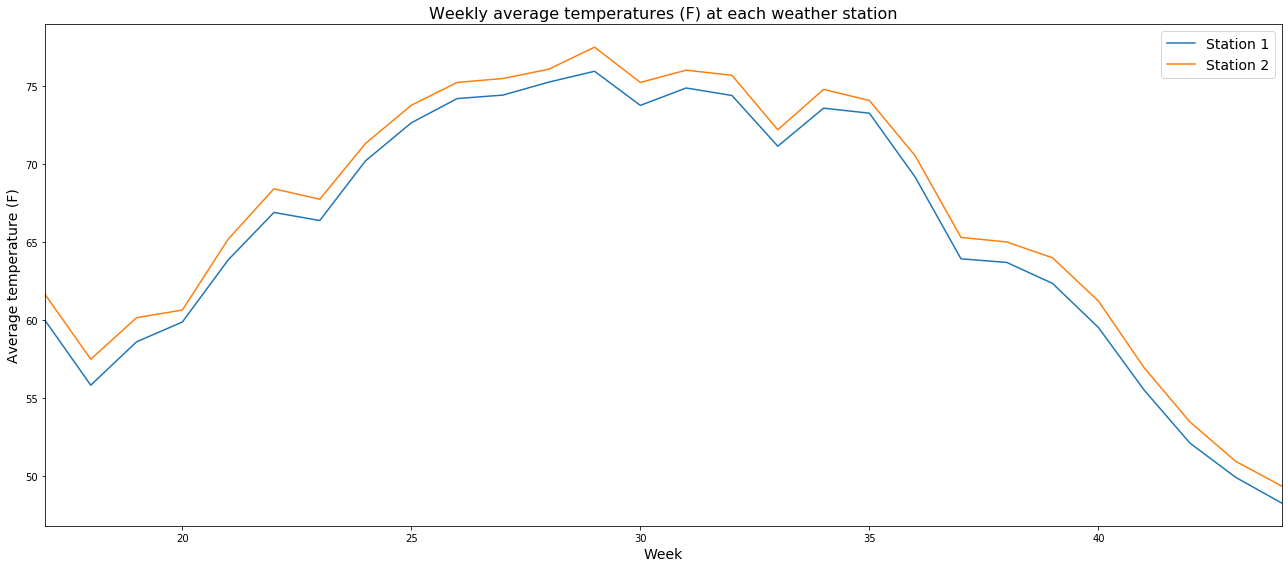

In [140]:
# plot weekly temperature by station
plt.figure(figsize=(18,8))
sns.lineplot(x = 'Week',y = 'Tavg', data = weather[weather.Station==1], ci = None, label = "Station 1")
sns.lineplot(x = 'Week',y = 'Tavg', data = weather[weather.Station==2], ci = None, label = "Station 2")
plt.legend(fontsize = 14)
plt.title('Weekly average temperatures (F) at each weather station', fontsize=16)
plt.xlabel('Week',fontsize=14)
plt.ylabel('Average temperature (F)',fontsize=14)
plt.xlim(weather.Week.min(), weather.Week.max())
plt.tight_layout()

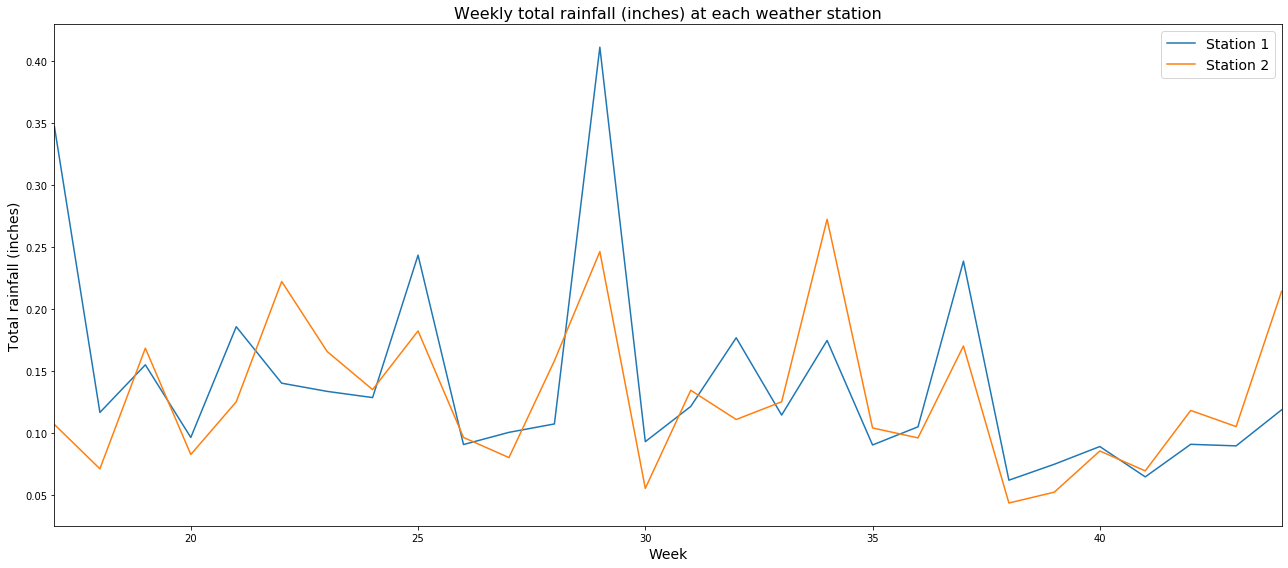

In [141]:
# plot weekly rainfall by station
plt.figure(figsize=(18,8))
sns.lineplot(x = 'Week',y = 'PrecipTotal',data = weather[weather.Station==1],ci = None,label = "Station 1")
sns.lineplot(x = 'Week',y = 'PrecipTotal',data = weather[weather.Station==2],ci = None,label = "Station 2")
plt.legend(fontsize = 14)
plt.title('Weekly total rainfall (inches) at each weather station', fontsize=16)
plt.xlabel('Week',fontsize=14)
plt.ylabel('Total rainfall (inches)',fontsize=14)
plt.xlim(weather.Week.min(), weather.Week.max())
plt.tight_layout()

### Pairplot

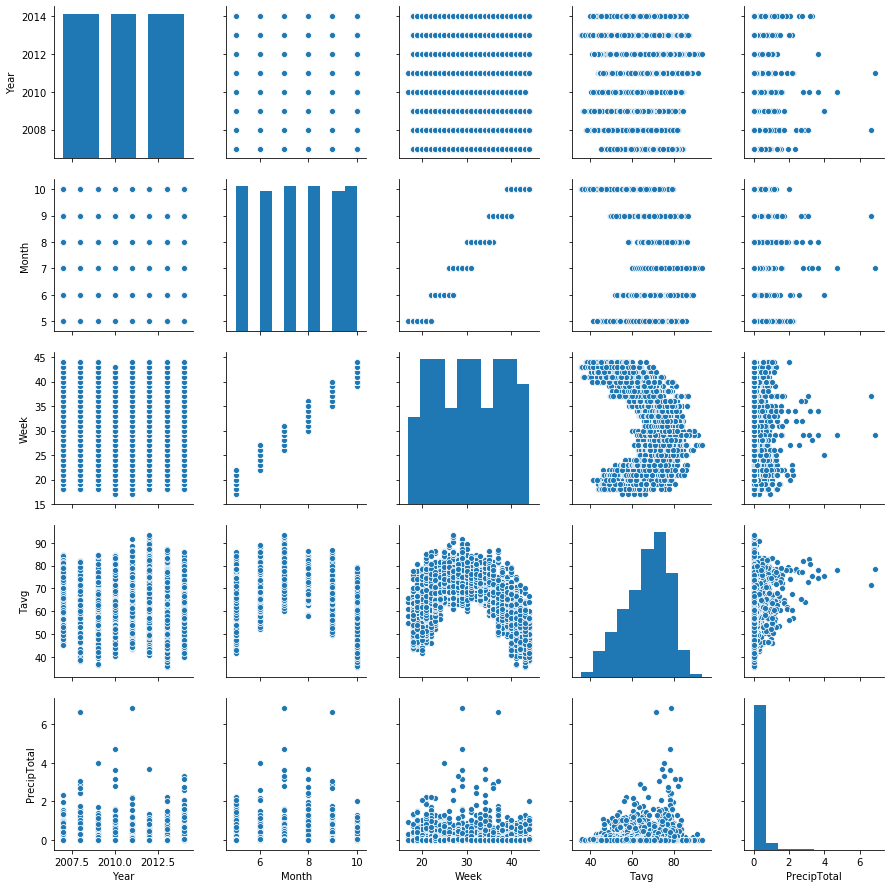

In [142]:
sns.pairplot(weather[['Year','Month','Week','Tavg', 'PrecipTotal']])

### Add Feature

#### 1. Add temperature range

In [143]:
weather['TRange'] = weather['Tmax'] - weather['Tmin']

In [144]:
weather.head()

Station       Date  Tmax  Tmin  Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50 66.50     14        51      56    0    2   
1        2 2007-05-01    84    52 68.00      M        51      57    0    3   
2        1 2007-05-02    59    42 50.50     -3        42      47   14    0   
3        2 2007-05-02    60    43 51.50      M        42      47   13    0   
4        1 2007-05-03    66    46 56.00      2        40      48    9    0   

  Sunrise Sunset CodeSum Depth Water1 SnowFall  PrecipTotal StnPressure  \
0    0448   1849             0      M      0.0         0.00       29.10   
1       -      -             M      M        M         0.00       29.18   
2    0447   1850      BR     0      M      0.0         0.00       29.38   
3       -      -   BR HZ     M      M        M         0.00       29.44   
4    0446   1851             0      M      0.0         0.00       29.39   

  SeaLevel  ResultSpeed  ResultDir AvgSpeed  Year  Month  Week  Day  TRange  
0    29.82         1.70         27      9.2  2007      5    18    1      33  
1    29.82         2.70         25      9.6  2007      5    18    1      32  
2    30.09        13.00          4     13.4  2007      5    18    2      17  
3    30.08        13.30          2     13.4  2007      5    18    2      17  
4    30.12        11.70          7     11.9  2007      5    18    3      20

#### 2. Add relative humidity

In [145]:
# Function to calculate relative humidity
def relative_humidity(tavg,dewpoint):
    #converted temperature to celcius
    tavg_celcius = (5.0/9.0)*(tavg-32.0)
    dewpoint_celcius = (5.0/9.0)*(dewpoint-32.0)
    # Calculated vapour pressure and actual pressure
    saturation_vapour_pressure = 6.11*10.0**(7.5*tavg_celcius/(237.7+tavg_celcius))
    actual_pressure = 6.11*10.0**(7.5*dewpoint_celcius/(237.7+dewpoint_celcius))
    #return relative humidity
    return round(((actual_pressure/saturation_vapour_pressure)*100))

In [146]:
# New column with Relative humidity values are created from the function
weather['relative_humidity']=relative_humidity(weather['Tavg'],weather['DewPoint']).astype(int)

In [147]:
weather.head()

Station       Date  Tmax  Tmin  Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50 66.50     14        51      56    0    2   
1        2 2007-05-01    84    52 68.00      M        51      57    0    3   
2        1 2007-05-02    59    42 50.50     -3        42      47   14    0   
3        2 2007-05-02    60    43 51.50      M        42      47   13    0   
4        1 2007-05-03    66    46 56.00      2        40      48    9    0   

  Sunrise Sunset CodeSum Depth Water1 SnowFall  PrecipTotal StnPressure  \
0    0448   1849             0      M      0.0         0.00       29.10   
1       -      -             M      M        M         0.00       29.18   
2    0447   1850      BR     0      M      0.0         0.00       29.38   
3       -      -   BR HZ     M      M        M         0.00       29.44   
4    0446   1851             0      M      0.0         0.00       29.39   

  SeaLevel  ResultSpeed  ResultDir AvgSpeed  Year  Month  Week  Day  TRange  \
0    29.82         1.70         27      9.2  2007      5    18    1      33   
1    29.82         2.70         25      9.6  2007      5    18    1      32   
2    30.09        13.00          4     13.4  2007      5    18    2      17   
3    30.08        13.30          2     13.4  2007      5    18    2      17   
4    30.12        11.70          7     11.9  2007      5    18    3      20   

   relative_humidity  
0                 57  
1                 55  
2                 73  
3                 70  
4                 55

#### 3.Add number of days since it last rained

In [148]:
weather["days_since_rain"] = 0
days = 0

for i in range(weather.shape[0]):
    if weather.loc[i,'PrecipTotal'] == 0:
        days = days + 1
        weather.loc[i,'days_since_rain'] = days
    else:
        weather.loc[i, 'days_since_rain'] = 0
        days=0

In [149]:
weather.head(100)

Station       Date  Tmax  Tmin  Tavg Depart  DewPoint WetBulb Heat Cool  \
0         1 2007-05-01    83    50 66.50     14        51      56    0    2   
1         2 2007-05-01    84    52 68.00      M        51      57    0    3   
2         1 2007-05-02    59    42 50.50     -3        42      47   14    0   
3         2 2007-05-02    60    43 51.50      M        42      47   13    0   
4         1 2007-05-03    66    46 56.00      2        40      48    9    0   
5         2 2007-05-03    67    48 57.50      M        40      50    7    0   
6         1 2007-05-04    66    49 57.50      4        41      50    7    0   
7         2 2007-05-04    78    51 64.50      M        42      50    M    M   
8         1 2007-05-05    66    53 59.50      5        38      49    5    0   
9         2 2007-05-05    66    54 60.00      M        39      50    5    0   
10        1 2007-05-06    68    49 58.50      4        30      46    6    0   
11        2 2007-05-06    68    52 60.00      M        30      46    5    0   
12        1 2007-05-07    83    47 65.00     10        41      54    0    0   
13        2 2007-05-07    84    50 67.00      M        39      53    0    2   
14        1 2007-05-08    82    54 68.00     12        58      62    0    3   
15        2 2007-05-08    80    60 70.00      M        57      63    0    5   
16        1 2007-05-09    77    61 69.00     13        59      63    0    4   
17        2 2007-05-09    76    63 69.50      M        60      63    0    5   
18        1 2007-05-10    84    56 70.00     14        52      60    0    5   
19        2 2007-05-10    83    59 71.00      M        52      61    0    6   
20        1 2007-05-11    70    51 60.50      4        42      51    4    0   
21        2 2007-05-11    73    49 61.00      M        44      51    4    0   
22        1 2007-05-12    64    46 55.00     -2        36      46   10    0   
23        2 2007-05-12    65    47 56.00      M        37      46    9    0   
24        1 2007-05-13    69    43 56.00     -2        33      46    9    0   
25        2 2007-05-13    69    44 56.50      M        32      46    8    0   
26        1 2007-05-14    90    56 73.00     15        47      59    0    8   
27        2 2007-05-14    90    54 72.00      M        45      58    0    7   
28        1 2007-05-15    80    57 68.50     11        56      61    0    4   
29        2 2007-05-15    82    56 69.00      M        56      61    0    4   
30        1 2007-05-16    66    44 55.00     -4        43      48   10    0   
31        2 2007-05-16    64    45 54.50      M        42      47   10    0   
32        1 2007-05-17    62    43 52.50     -6        32      43   12    0   
33        2 2007-05-17    61    44 52.50      M        32      43   12    0   
34        1 2007-05-18    71    42 56.50     -3        30      46    8    0   
35        2 2007-05-18    70    43 56.50      M        31      47    8    0   
36        1 2007-05-19    80    56 68.00      8        39      53    0    3   
37        2 2007-05-19    80    56 68.00      M        37      53    0    3   
38        1 2007-05-20    69    43 56.00     -5        40      44    9    0   
39        2 2007-05-20    69    44 56.50      M        41      45    8    0   
40        1 2007-05-21    80    44 62.00      1        50      56    3    0   
41        2 2007-05-21    79    46 62.50      M        50      57    2    0   
42        1 2007-05-22    87    55 71.00     10        46      58    0    6   
43        2 2007-05-22    87    60 73.50      M        44      58    0    9   
44        1 2007-05-23    89    60 74.50     14        49      61    0   10   
45        2 2007-05-23    89    66 77.50      M        48      61    0   13   
46        1 2007-05-24    88    63 75.50     14        54      63    0   11   
47        2 2007-05-24    88    66 77.00      M        53      63    0   12   
48        1 2007-05-25    70    56 63.00      1        44      53    2    0   
49        2 2007-05-25    66    57 61.50      M       

#### We also wanted to see the effect of shifting time forward or whether a lagged weather feature in a given number of days would impact the number of mosquitos. The code below shows our approach to applying this method

#### 4. 14 days Lagged weather feature

In [150]:
# set a new dataframe for the features i want to do a time lag on
var = ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'SnowFall',
       'PrecipTotal', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

lag_features = weather[var]

In [151]:
# set the number of lags i want, these are the lags in days
lags = (7,14)

# set to a final dataframe
# .assign assigns new columns to the dataframe, after that is a list comprehension
# f'{col}_lag_{n}' <-- f' string feature to assign column name, its like .format()
# list comp <-- for every column shift down for every lag
weather = weather.assign(**{f'{col}_lag_{n}': 
                                       lag_features[col].shift(n) for n in lags for col in lag_features})

### Combine data from station 1 and 2

In [152]:
weather_combined = weather.groupby('Date').mean()
weather_combined.reset_index(inplace=True)

In [153]:
weather_combined.head()

Date  Station  Tmax  Tmin  Tavg  DewPoint  PrecipTotal  ResultSpeed  \
0 2007-05-01     1.50 83.50 51.00 67.25     51.00         0.00         2.20   
1 2007-05-02     1.50 59.50 42.50 51.00     42.00         0.00        13.15   
2 2007-05-03     1.50 66.50 47.00 56.75     40.00         0.00        12.30   
3 2007-05-04     1.50 72.00 50.00 61.00     41.50         0.00        10.25   
4 2007-05-05     1.50 66.00 53.50 59.75     38.50         0.00        11.45   

   ResultDir     Year  Month  Week  Day  TRange  relative_humidity  \
0      26.00 2,007.00   5.00 18.00 1.00   32.50              56.00   
1       3.00 2,007.00   5.00 18.00 2.00   17.00              71.50   
2       6.50 2,007.00   5.00 18.00 3.00   19.50              53.50   
3       7.50 2,007.00   5.00 18.00 4.00   22.00              49.00   
4       7.00 2,007.00   5.00 18.00 5.00   12.50              45.50   

   days_since_rain  Tmax_lag_7  Tmin_lag_7  Tavg_lag_7  DewPoint_lag_7  \
0             1.50         nan         nan         nan             nan   
1             3.50         nan         nan         nan             nan   
2             5.50         nan         nan         nan             nan   
3             7.50       83.00       50.00       66.50           51.00   
4             9.50       71.50       47.00       59.25           46.50   

   PrecipTotal_lag_7  ResultSpeed_lag_7  ResultDir_lag_7  Tmax_lag_14  \
0                nan                nan              nan          nan   
1                nan                nan              nan          nan   
2                nan                nan              nan          nan   
3               0.00               1.70            27.00          nan   
4               0.00               7.85            14.50          nan   

   Tmin_lag_14  Tavg_lag_14  DewPoint_lag_14  PrecipTotal_lag_14  \
0          nan          nan              nan                 nan   
1          nan          nan              nan                 nan   
2          nan          nan              nan                 nan   
3          nan          nan              nan                 nan   
4          nan          nan              nan                 nan   

   ResultSpeed_lag_14  ResultDir_lag_14  
0                 nan               nan  
1                 nan               nan  
2                 nan               nan  
3                 nan               nan  
4                 nan               nan

In [154]:
weather_combined.shape

(1472, 30)

In [155]:
weather_combined.to_csv("weather_combined.csv", index=False)

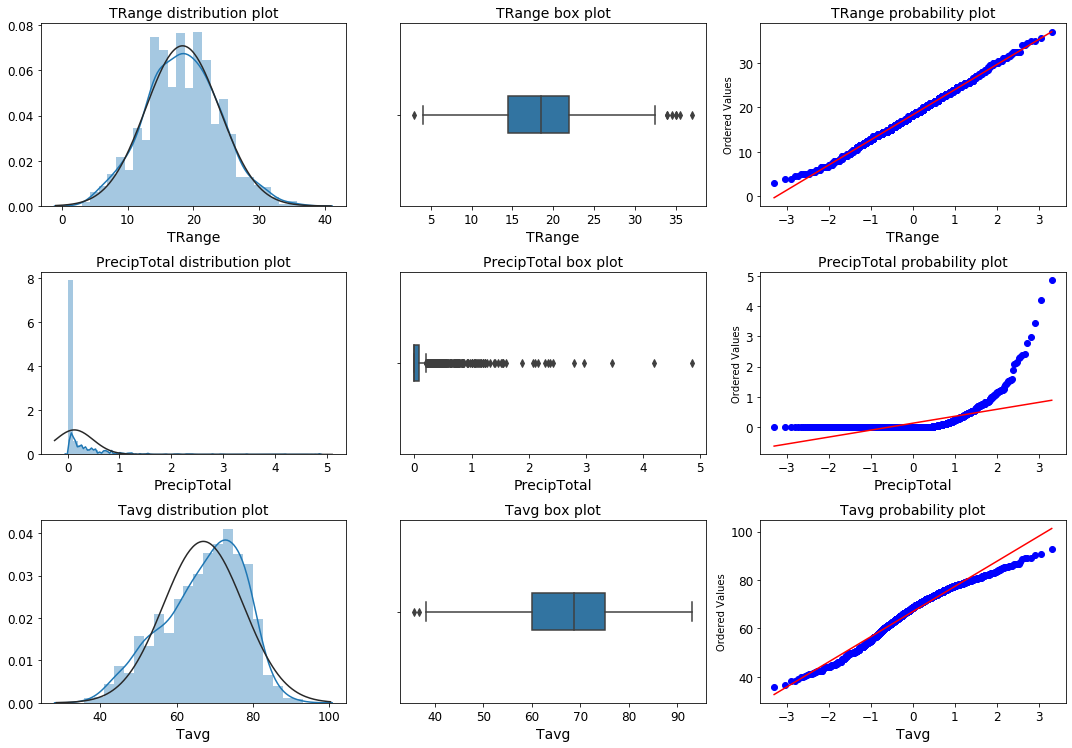

In [156]:
def dist_plots(df, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize=(15, nrows*3.5))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.distplot(df[col], ax = ax[i*3-3], fit = stats.norm)
        ax[i*3-3].set_title(f'{col} distribution plot',fontsize=14)
        ax[i*3-3].tick_params(labelsize=12)
        ax[i*3-3].set_xlabel(col, fontsize=14)
        
        sns.boxplot(df[col], width = 0.2, ax = ax[i*3-2])
        ax[i*3-2].set_title(f'{col} box plot',fontsize=14)
        ax[i*3-2].tick_params(labelsize=12)
        ax[i*3-2].set_xlabel(col, fontsize=14)
        
        stats.probplot(df[col], plot = ax[i*3-1])
        ax[i*3-1].set_title(f'{col} probability plot', fontsize=14)
        ax[i*3-1].tick_params(labelsize=12)
        ax[i*3-1].set_xlabel(col, fontsize=14)
    plt.tight_layout()

dist_plots(weather_combined,['Tavg', 'TRange', 'PrecipTotal'])